## Imports

In [1]:
# ONLY USE THESE IMPORTS.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [2]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
train = np.array([plt.imread('Data/Train/'+str(i)+'.jpg').reshape(-1) for i in range (1,2401)])
test = np.array([plt.imread('Data/Test/'+str(i)+'.jpg').reshape(-1) for i in range (1,201)])
train_labels = np.loadtxt('Data/Train/Training Labels.txt')
test_labels = np.loadtxt('Data/Test/Test Labels.txt')
print(train.shape, test.shape)
print(train_labels.shape,test_labels.shape)
train

(2400, 784) (200, 784)
(2400,) (200,)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Quantize Images

In [3]:
def quantizeimage(x,levels):
    bins = np.empty(levels, dtype=int)
    bins[0] = 0
    increaserate = 256//levels
    for i in range(levels - 1):
        bins[i+1] = bins[i] + increaserate
    digitized = np.digitize(x, bins, right=True)
    quantized = np.empty(len(x), dtype=int)
    for i in range(len(quantized)):
        quantized[i] = bins[digitized[i]-1]
        if x[i] < 1:
            quantized[i] = bins[0]
    return quantized

## Compute Naive Bayes

In [4]:
list_of_confusion_matrices = None
list_of_accuracies = np.zeros(8,)
for power in range(8):
    ##quantize train_images for the n level:
    train_2levels = np.zeros((2400,784))
    for i,trainimage in enumerate(train):
        train_2levels[i] = quantizeimage(trainimage, 2**(power+1))
    ##quantize test_images for the n level:
    test_2levels = np.zeros((200,784))
    for i,testimage in enumerate(test):
        test_2levels[i] = quantizeimage(testimage, 2**(power+1))

    confusion_matrix = np.zeros((10,10))
    #probability of each class in each test image:
    class_probabilities = np.zeros((200, 10))
    #calculate probabilities:
    for test_data_index, testimage in enumerate(test_2levels):        
        #start of prob of class 0: pixel 0:
        pixel_value_occurences = 0
        for train_class_zero in train_2levels[:240]:
            if testimage[0] == train_class_zero[0]:
                pixel_value_occurences += 1
        pixel_value_occurences /= 240
        probability_of_class_zero = pixel_value_occurences
        
        #prob of class 0: pixels 1-784:
        for pixel_index, test_pixel_value in enumerate(testimage[1:]):
            pixel_value_occurences = 0
            for train_class_zero in train_2levels[:240]:
                if test_pixel_value == train_class_zero[pixel_index+1]:    #added +1 to the index of train image to match the test image which starts the loop from index (pixel) 1
                    pixel_value_occurences += 1
            pixel_value_occurences /= 240
            probability_of_class_zero *= pixel_value_occurences
        #end of prob of class 0, save the prob:
        class_probabilities[test_data_index][0]=probability_of_class_zero

        #start of prob of classes 1-9:
        for class_index in range(9):
            #pixel 0:
            pixel_value_occurences = 0
            for train_current_class in train_2levels[240*(class_index+1):240*(class_index+2)]:
                if testimage[0] == train_current_class[0]:
                    pixel_value_occurences += 1
            pixel_value_occurences /= 240
            probability_of_current_class = pixel_value_occurences
            
            #pixels 1-784:
            for pixel_index, test_pixel_value in enumerate(testimage[1:]):
                pixel_value_occurences = 0
                for train_current_class in train_2levels[240*(class_index+1):240*(class_index+2)]:
                    if test_pixel_value == train_current_class[pixel_index+1]:
                        pixel_value_occurences += 1
                pixel_value_occurences /= 240
                probability_of_current_class *= pixel_value_occurences
            
            class_probabilities[test_data_index][class_index+1]=probability_of_current_class


    #increment the value of max class index in the test image index 
    for class_prob_test_img_ind, class_prob_test_img in enumerate(class_probabilities):
        #print(class_prob_test_img[np.argmax(class_prob_test_img)])
        confusion_matrix[class_prob_test_img_ind//20][np.argmax(class_prob_test_img)] += 1

    accuracy = 0.0
    for i in range(len(confusion_matrix)):
        accuracy += confusion_matrix[i][i]
    accuracy /= 200.0
    list_of_accuracies[power] = accuracy
    print(accuracy)
    
    #confusion_matrix
    if (list_of_confusion_matrices is None):
        list_of_confusion_matrices = confusion_matrix
        list_of_confusion_matrices = list_of_confusion_matrices.reshape((-1, 10, 10))
        print('print',power, confusion_matrix)
    else:
        list_of_confusion_matrices = np.concatenate((list_of_confusion_matrices, [confusion_matrix]),axis=0)
        print('print',power, confusion_matrix)
        
print(list_of_accuracies)
print(list_of_accuracies.shape)
print(list_of_confusion_matrices.shape)
list_of_confusion_matrices
#test_2levels.shape

# Make sure you return these two lists
#list_of_confusion_matrices_old = list_of_confusion_matrices
#list_of_accuracies_old = list_of_accuracies

0.77
print 0 [[18.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0. 20.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1. 17.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. 16.  1.  1.  0.  0.  2.  0.]
 [ 1.  0.  0.  0.  8.  0.  5.  0.  1.  5.]
 [ 0.  0.  0.  1.  2. 16.  0.  0.  0.  1.]
 [ 1.  0.  1.  0.  0.  1. 17.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.  0. 14.  0.  4.]
 [ 1.  0.  0.  1.  0.  1.  0.  0. 15.  2.]
 [ 0.  0.  0.  1.  5.  0.  0.  0.  1. 13.]]
0.69
print 1 [[17.  0.  0.  0.  0.  1.  2.  0.  0.  0.]
 [ 1. 18.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 4.  0. 14.  0.  1.  0.  0.  0.  1.  0.]
 [ 2.  0.  0. 17.  0.  0.  0.  0.  1.  0.]
 [ 3.  0.  0.  0.  8.  0.  4.  0.  1.  4.]
 [ 2.  0.  1.  1.  0. 13.  0.  0.  1.  2.]
 [ 8.  0.  0.  0.  0.  1. 11.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  0. 13.  0.  5.]
 [ 2.  0.  0.  2.  0.  1.  0.  0. 15.  0.]
 [ 4.  0.  0.  0.  1.  0.  0.  2.  1. 12.]]
0.505
print 2 [[18.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 1. 16.  0.  0.  0.  2.  0.  0.  1.  0.]
 [13.  0.  6

array([[[18.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1., 17.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0., 16.,  1.,  1.,  0.,  0.,  2.,  0.],
        [ 1.,  0.,  0.,  0.,  8.,  0.,  5.,  0.,  1.,  5.],
        [ 0.,  0.,  0.,  1.,  2., 16.,  0.,  0.,  0.,  1.],
        [ 1.,  0.,  1.,  0.,  0.,  1., 17.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  0.,  0., 14.,  0.,  4.],
        [ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  0., 15.,  2.],
        [ 0.,  0.,  0.,  1.,  5.,  0.,  0.,  0.,  1., 13.]],

       [[17.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.],
        [ 1., 18.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 4.,  0., 14.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
        [ 2.,  0.,  0., 17.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 3.,  0.,  0.,  0.,  8.,  0.,  4.,  0.,  1.,  4.],
        [ 2.,  0.,  1.,  1.,  0., 13.,  0.,  0.,  1.,  2.],
        [ 8.,  0.,  0.,  0.,  0.,  1.,

## Plot confusion matrices and accuracy for each quantization level

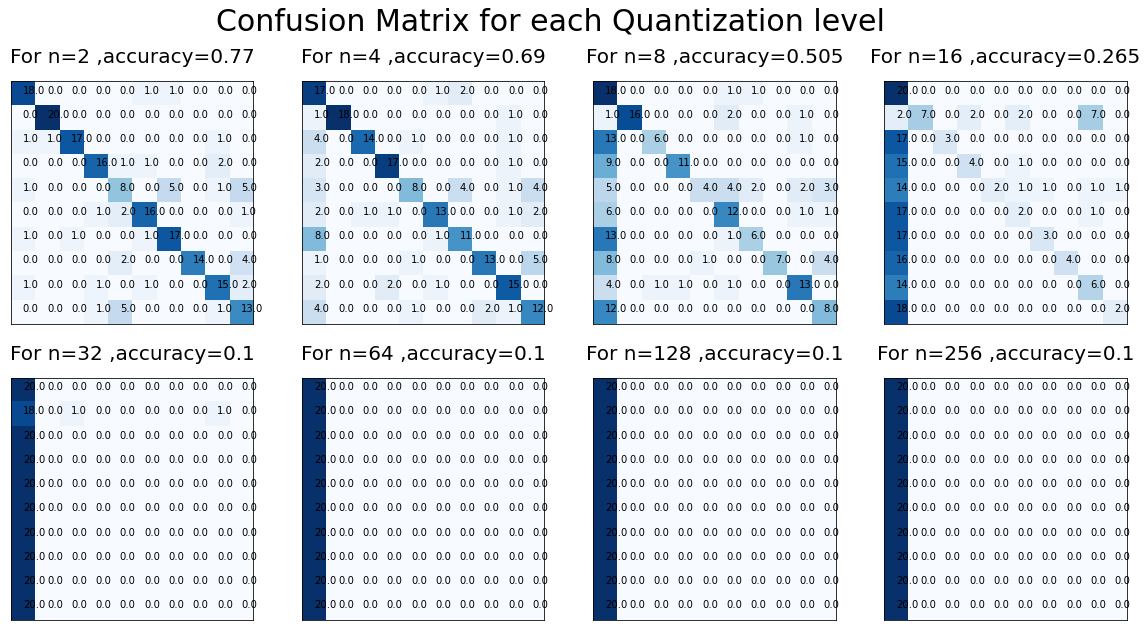

In [5]:
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)

## Plot accuracy levels for each quantization level

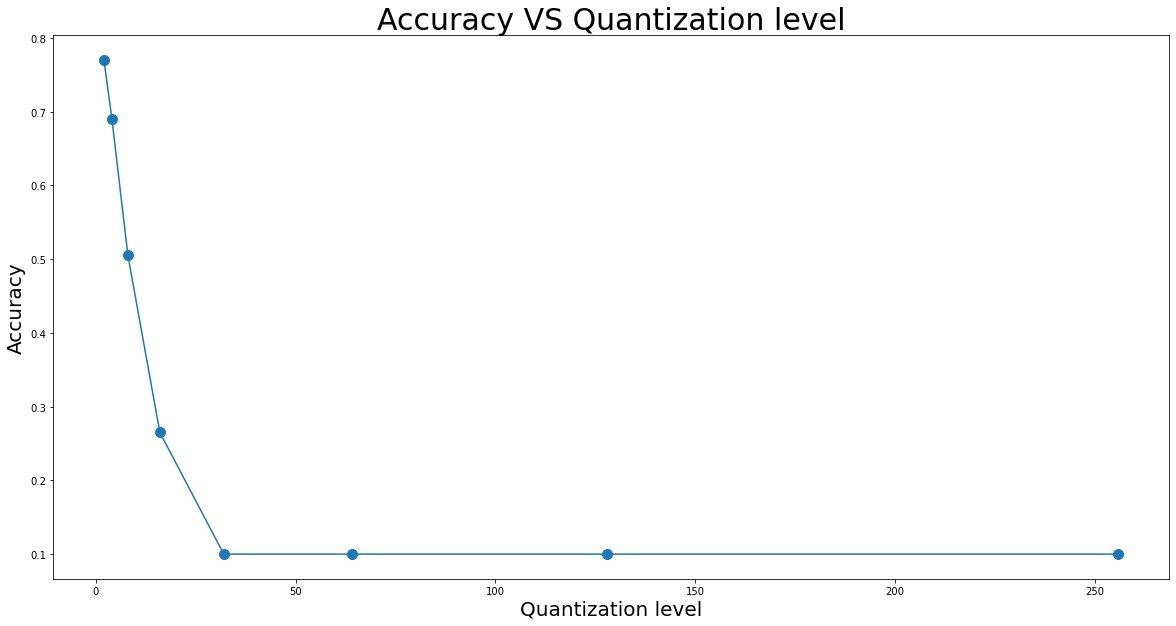

In [6]:
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)

---

## Compute Naive Bayes (replace probabilities of 0 with 0.00001)

#### Added "if (pixel_value_occurences == 0.0):pixel_value_occurences = 0.00001" after calculations of the probability of pixel. 

In [7]:
list_of_confusion_matrices = None
list_of_accuracies = np.zeros(8,)
##quantize train_images for the 2 level:
for power in range(8):
    train_2levels = np.zeros((2400,784))
    for i,trainimage in enumerate(train):
        train_2levels[i] = quantizeimage(trainimage, 2**(power+1))
    ##quantize test_images for the 2 level:
    test_2levels = np.zeros((200,784))
    for i,testimage in enumerate(test):
        test_2levels[i] = quantizeimage(testimage, 2**(power+1))

    confusion_matrix = np.zeros((10,10))
    #probability of each class in each test image:
    class_probabilities = np.zeros((200, 10))
    #calculate probabilities:
    for test_data_index, testimage in enumerate(test_2levels):
        
        #start of prob of class 0: pixel 0:
        pixel_value_occurences = 0
        for train_class_zero in train_2levels[:240]:
            if testimage[0] == train_class_zero[0]:
                pixel_value_occurences += 1
        pixel_value_occurences /= 240
        if (pixel_value_occurences == 0.0):
            pixel_value_occurences = 0.00001
        probability_of_class_zero = pixel_value_occurences
        
        #prob of class 0: pixels 1-784:
        for pixel_index, test_pixel_value in enumerate(testimage[1:]):
            pixel_value_occurences = 0
            for train_class_zero in train_2levels[:240]:
                if test_pixel_value == train_class_zero[pixel_index+1]:    #added +1 to the index of train image to match the test image which starts the loop from index (pixel) 1
                    pixel_value_occurences += 1
            pixel_value_occurences /= 240
            if (pixel_value_occurences == 0.0):
                pixel_value_occurences = 0.00001
            probability_of_class_zero *= pixel_value_occurences
        #print(test_data_index//20, 'class 0', probability_of_class_zero)
        class_probabilities[test_data_index][0]=probability_of_class_zero

        #start of prob of classes 1-9:
        for class_index in range(9):
            #pixel 0:
            pixel_value_occurences = 0
            for train_current_class in train_2levels[240*(class_index+1):240*(class_index+2)]:
                if testimage[0] == train_current_class[0]:
                    pixel_value_occurences += 1
            pixel_value_occurences /= 240
            if (pixel_value_occurences == 0.0):
                pixel_value_occurences = 0.00001
            probability_of_current_class = pixel_value_occurences
            
            #pixels 1-784:
            for pixel_index, test_pixel_value in enumerate(testimage[1:]):
                pixel_value_occurences = 0
                for train_current_class in train_2levels[240*(class_index+1):240*(class_index+2)]:
                    if test_pixel_value == train_current_class[pixel_index+1]:
                        pixel_value_occurences += 1
                pixel_value_occurences /= 240
                if (pixel_value_occurences == 0.0):
                    pixel_value_occurences = 0.00001
                probability_of_current_class *= pixel_value_occurences
            #print(test_data_index//20, 'class', class_index+1, probability_of_current_class)
            class_probabilities[test_data_index][class_index+1]=probability_of_current_class


    #increment the value of max class index in the test image index 
    for class_prob_test_img_ind, class_prob_test_img in enumerate(class_probabilities):
        #print(class_prob_test_img[np.argmax(class_prob_test_img)])
        #class_prob_test_img = array1 = np.where(class_prob_test_img==0.0, 0.00001, class_prob_test_img)
        confusion_matrix[class_prob_test_img_ind//20][np.argmax(class_prob_test_img)] += 1

    accuracy = 0.0
    for i in range(len(confusion_matrix)):
        accuracy += confusion_matrix[i][i]
    accuracy /= 200.0
    list_of_accuracies[power] = accuracy
    print(accuracy)
    
    #confusion_matrix
    if (list_of_confusion_matrices is None):
        list_of_confusion_matrices = confusion_matrix
        list_of_confusion_matrices = list_of_confusion_matrices.reshape((-1, 10, 10))
        print('print',power, confusion_matrix)
    else:
        list_of_confusion_matrices = np.concatenate((list_of_confusion_matrices, [confusion_matrix]),axis=0)
        print('print',power, confusion_matrix)
        
print(list_of_accuracies)
print(list_of_accuracies.shape)
print(list_of_confusion_matrices.shape)
list_of_confusion_matrices
#test_2levels.shape

0.805
print 0 [[18.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0. 20.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. 17.  0.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0. 17.  0.  1.  0.  0.  2.  0.]
 [ 0.  0.  0.  0. 13.  0.  1.  0.  1.  5.]
 [ 0.  0.  0.  1.  2. 16.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  1. 18.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.  0. 14.  0.  4.]
 [ 1.  0.  0.  1.  0.  0.  0.  0. 16.  2.]
 [ 1.  0.  1.  0.  5.  0.  0.  0.  1. 12.]]
0.805
print 1 [[18.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0. 20.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 16.  1.  0.  0.  1.  0.  2.  0.]
 [ 0.  0.  0. 18.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0. 14.  0.  1.  0.  1.  4.]
 [ 0.  0.  0.  1.  2. 15.  0.  0.  0.  2.]
 [ 0.  0.  1.  0.  0.  0. 19.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.  0. 13.  0.  5.]
 [ 1.  0.  0.  2.  0.  0.  0.  0. 16.  1.]
 [ 1.  0.  1.  0.  5.  0.  0.  0.  1. 12.]]
0.81
print 2 [[18.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0. 20.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 1

array([[[18.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., 17.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
        [ 0.,  0.,  0., 17.,  0.,  1.,  0.,  0.,  2.,  0.],
        [ 0.,  0.,  0.,  0., 13.,  0.,  1.,  0.,  1.,  5.],
        [ 0.,  0.,  0.,  1.,  2., 16.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  0.,  0.,  1., 18.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  0.,  0., 14.,  0.,  4.],
        [ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0., 16.,  2.],
        [ 1.,  0.,  1.,  0.,  5.,  0.,  0.,  0.,  1., 12.]],

       [[18.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 16.,  1.,  0.,  0.,  1.,  0.,  2.,  0.],
        [ 0.,  0.,  0., 18.,  0.,  0.,  0.,  0.,  2.,  0.],
        [ 0.,  0.,  0.,  0., 14.,  0.,  1.,  0.,  1.,  4.],
        [ 0.,  0.,  0.,  1.,  2., 15.,  0.,  0.,  0.,  2.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,

## Plot confusion matrices and accuracy for each quantization level

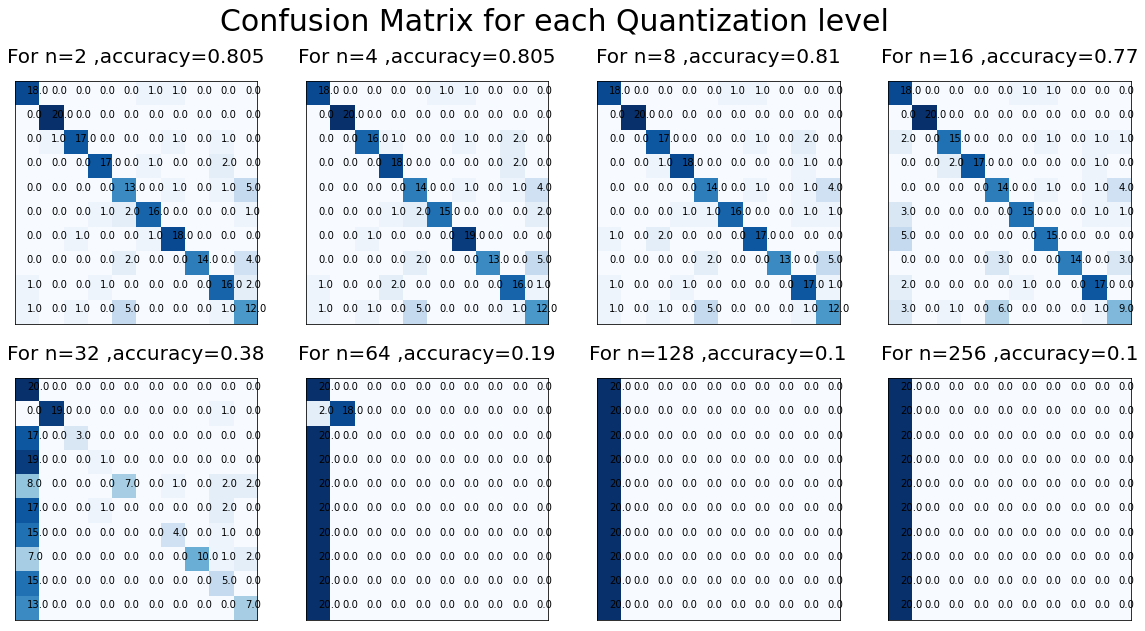

In [8]:
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)

## Plot accuracy levels for each quantization level

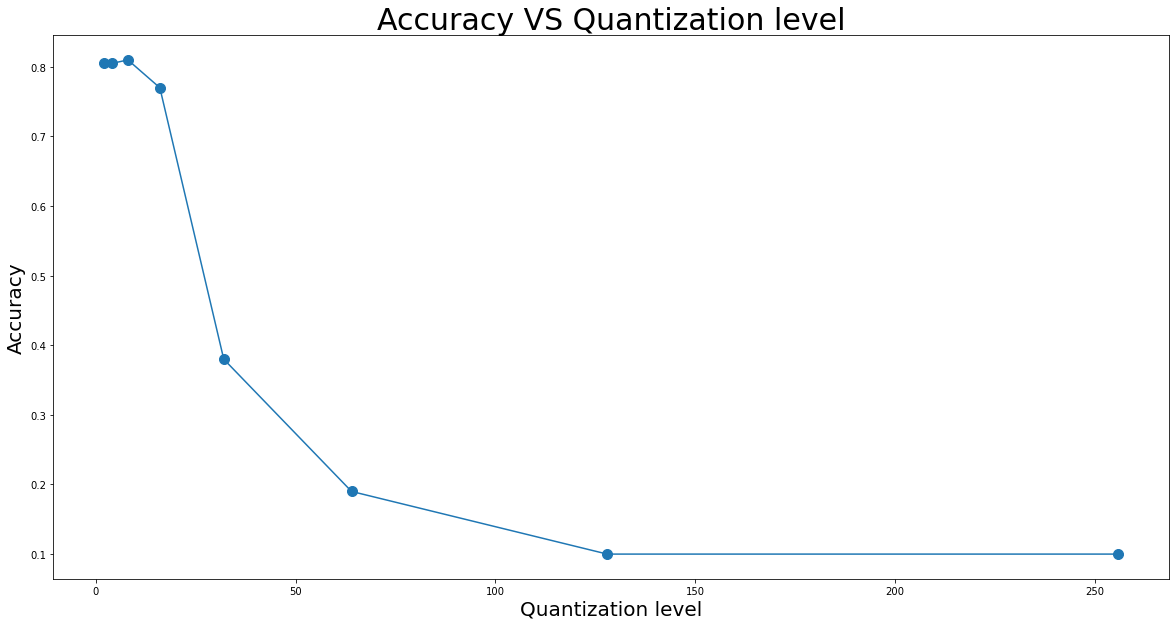

In [9]:
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)

### The fact is that as the number of quantization level increases then we get a detailed larger amount of pixels to choose from, and to match a detailed test pixel to a current train pixel will miss out some of other training data that of the same class. Meanwhile if the quantization is low (ex.: 2) the values of a test pixel to choose or decide depending on is easy and clear for the pixel to be classified for each of the pixels of the train classes data. The reason of increasing the accuracy after replacing 0 probabilities of pixels with very small value (0.00001) is that zero multiplies anything is zero, while if we replaced it with any other value even though it is very small it will result a number that would enhance the calculations.

## Thank you :D